In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid235.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid296.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid387.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid509.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid315.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid580.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid327.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid486.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid370.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Validation/NoMask/nomask_valid48.jpg
/kaggle/input/binary-class-dataset/Binary Class Dataset/Valid

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import random
from PIL import Image

In [6]:
train_path = "../input/binary-class-dataset/Binary Class Dataset/Training"
test_path = "../input/binary-class-dataset/Binary Class Dataset/Testing"
val_path = "../input/binary-class-dataset/Binary Class Dataset/Validation"


['NoMask', 'Mask']


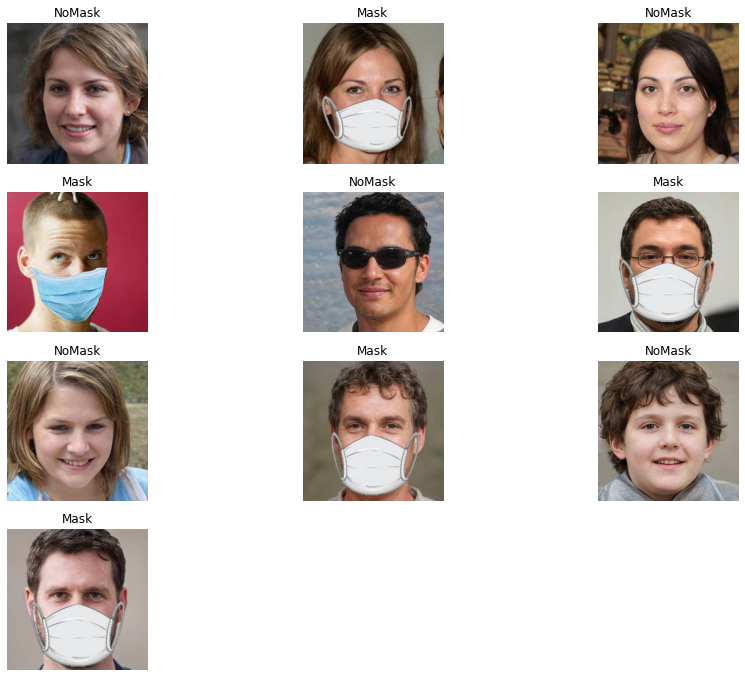

In [7]:
classes = os.listdir("/kaggle/input/binary-class-dataset/Binary Class Dataset/Training")
print(classes)
sample = 5
sample_images = []
sample_name = []

for i in range(sample):
    for img in classes:
        img_name = f'{train_path}/{img}/{random.choice(os.listdir(f"{train_path}/{img}"))}'
        sample_images.append(img_name)
        sample_name.append(img)
        
plt.figure(figsize = (15,15))

for i in range(len(sample_images)):
    plt.subplot(sample,3,i+1)
    plt.imshow(Image.open(sample_images[i]),cmap = 'gray')
    plt.title(sample_name[i])
    plt.axis('off')

In [8]:
x_train = []

for masktype in os.listdir(train_path):
    
    imgfolder = train_path+"/"+masktype
    
    for img in os.listdir(imgfolder):
        img_path = imgfolder+"/"+img
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test = []

for masktype in os.listdir(test_path):
    
    imgfolder = test_path+"/"+masktype
    
    for img in os.listdir(imgfolder):
        img_path = imgfolder+"/"+img
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

x_val = []

for masktype in os.listdir(val_path):
    
    imgfolder = val_path+"/"+masktype
    
    for img in os.listdir(imgfolder):
        img_path = imgfolder+"/"+img
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)


In [9]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True, fill_mode="nearest") 
test_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 32,class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,target_size = (224,224),batch_size = 32,class_mode = 'sparse')
valid_set = test_datagen.flow_from_directory(val_path,target_size = (224,224),batch_size = 32,class_mode = 'sparse')

Found 6400 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [12]:
train_y = training_set.classes
test_y = test_set.classes
valid_y = valid_set.classes 

In [13]:
training_set.class_indices

{'Mask': 0, 'NoMask': 1}

In [14]:
print(train_y.shape)
print(test_y.shape)
print(valid_y.shape)

(6400,)
(2000,)
(1600,)


In [15]:
image_size = [224,224]
baseModel = tf.keras.applications.MobileNetV2(input_shape = image_size+[3],weights='imagenet',include_top=False )


2022-10-24 07:08:47.072506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 07:08:47.178923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 07:08:47.179752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 07:08:47.181505: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


In [16]:
headModel = baseModel.output
headModel = tf.keras.layers.AveragePooling2D(pool_size = (7,7))(headModel)
headModel = tf.keras.layers.Flatten()(headModel)
headModel = tf.keras.layers.Dense(128, activation = 'relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(2, activation = 'softmax')(headModel)

In [17]:
model = tf.keras.models.Model(inputs = baseModel.input, outputs = headModel)

In [18]:
for layers in baseModel.layers:
    baseModel.trainable = False

In [19]:
lr = 0.00001
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])

In [20]:
his = model.fit(train_x,train_y,validation_data = (val_x,valid_y),epochs = 50, batch_size = 32, shuffle=True)


2022-10-24 07:11:25.176858: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 963379200 exceeds 10% of free system memory.
2022-10-24 07:11:26.266440: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 963379200 exceeds 10% of free system memory.
2022-10-24 07:11:27.062306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-24 07:11:30.098753: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


200/200 [==============================] - 16s 38ms/step - loss: 0.7840 - accuracy: 0.5813 - val_loss: 0.4830 - val_accuracy: 0.8350
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 0.5454 - accuracy: 0.7262 - val_loss: 0.3756 - val_accuracy: 0.8687
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 0.4247 - accuracy: 0.8078 - val_loss: 0.3312 - val_accuracy: 0.8769
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 0.3780 - accuracy: 0.8344 - val_loss: 0.2979 - val_accuracy: 0.8894
Epoch 5/50
200/200 [==============================] - 6s 31ms/step - loss: 0.3251 - accuracy: 0.8716 - val_loss: 0.2774 - val_accuracy: 0.8975
Epoch 6/50
200/200 [==============================] - 6s 31ms/step - loss: 0.2948 - accuracy: 0.8900 - val_loss: 0.2603 - val_accuracy: 0.9006
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 0.2696 - accuracy: 0.9000 - val_loss: 0.2486 - val_accuracy: 0.9019
Epoch 8/5

In [21]:
model.evaluate(test_x,test_y,batch_size = 32)

63/63 [==============================] - 2s 27ms/step - loss: 0.0896 - accuracy: 0.9695


[0.08962235599756241, 0.9695000052452087]

In [ ]:
val = his.history
print(val.keys())

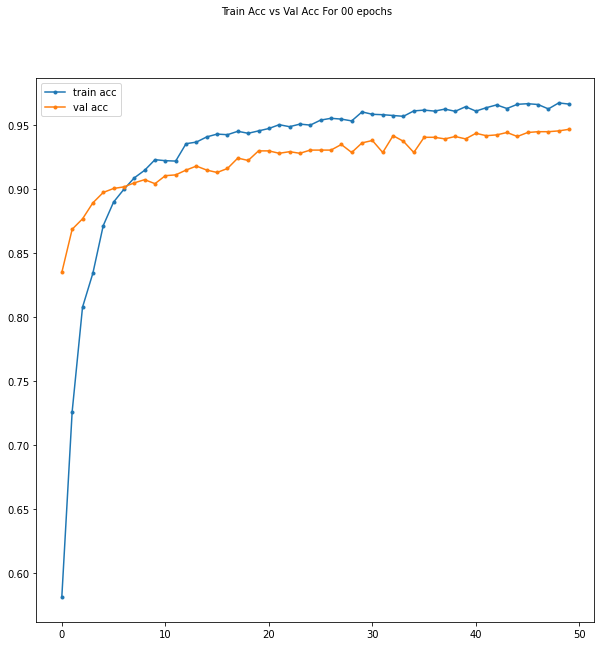

In [22]:
import matplotlib.pyplot as plt

x=his
plt.figure(figsize=(10,10))
plt.suptitle('Train Acc vs Val Acc For 00 epochs', fontsize=10)

plt.plot(x.history['accuracy'], label='train acc',marker='.')
plt.plot(x.history['val_accuracy'], label='val acc',marker='.')
plt.legend()
plt.savefig("Accuracy_0epochs.png")
plt.show()

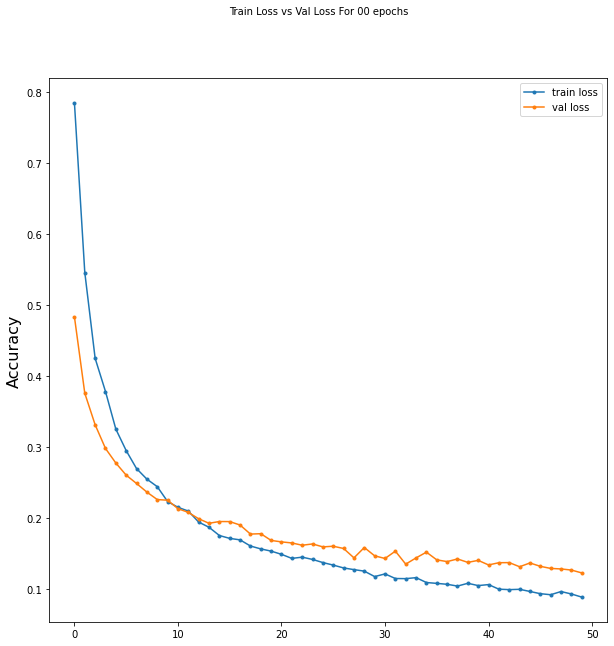

In [23]:
plt.figure(figsize=(10,10))
plt.suptitle('Train Loss vs Val Loss For 00 epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['loss'], label='train loss',marker='.')
plt.plot(x.history['val_loss'], label='val loss',marker='.')
plt.legend()
plt.savefig("Loss_00epochs.png")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [25]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred,axis = 1)


In [26]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1009
           1       0.96      0.97      0.97       991

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



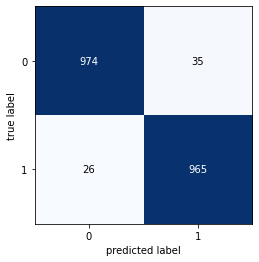

In [27]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

con=metrics.confusion_matrix(y_pred,test_y)
fig, ax = plot_confusion_matrix(conf_mat=con)
plt.show()

In [63]:
conf = confusion_matrix(y_pred,test_y)
print(conf)

[[993  35]
 [  7 965]]


In [28]:
print("[INFO] saving mask detector model...")

model.save("MobileNetV250.model", save_format="h5")

[INFO] saving mask detector model...


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
